# Final Project for Research Computing in Earth Science
## *Investigating Ocean Acidification in the Arctic* 

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pooch
import matplotlib
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'

# CESM Emission Scenarios

[Index of /data/oceans/ncei/ocads/data/0259391/nc/ESMs/CESM2]('https://www.ncei.noaa.gov/data/oceans/ncei/ocads/data/0259391/nc/ESMs/CESM2/')

In [77]:
# structure : {base_url}{variables}{scenarios}
cesm_base_url = 'https://www.ncei.noaa.gov/data/oceans/ncei/ocads/data/0259391/nc/ESMs/CESM2/CESM2_{}_{}.nc'
variables = ['Temperature','Salinity','pHT','pCO2']
scenarios = ['historical','ssp126','ssp245','ssp370','ssp585']

cesm_url_list = []
for i in variables:
    for j in scenarios:
        cesm_url_list.append(cesm_base_url.format(i,j)) 

#cesm_url_list

In [78]:
cesm = xr.open_mfdataset(cesm_url_list)

syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: <!DOCTYPE^ HTML PUBLIC "-//IETF//DTD HTML 2.0//EN"><html><head><title>404 Not Found</title></head><body><h1>Not Found</h1><p>The requested URL /data/oceans/ncei/ocads/data/0259391/nc/ESMs/CESM2/CESM2_Temperature_historical.nc.dds was not found on this server.</p></body></html>


OSError: [Errno -90] NetCDF: file not found: b'https://www.ncei.noaa.gov/data/oceans/ncei/ocads/data/0259391/nc/ESMs/CESM2/CESM2_Temperature_historical.nc'

# Sea Ice Extent

[Sea Ice Concentration, NOAA/NSIDC Climate Data Record V3, Arctic, 25km, Science Quality, 1978-2019, Monthly DEPRECATED]('https://polarwatch.noaa.gov/erddap/files/nsidcCDRiceSQnhmday/')

## Sea Ice Concentration

In [4]:
ice_base_url = 'https://polarwatch.noaa.gov/erddap/files/nsidcCDRiceSQnhmday/seaice_conc_monthly_nh_{}_{}_v03r01.nc'

yearmonthn07 = pd.period_range(start='197811', end='198707', freq='m').strftime('%Y%m').tolist()
yearmonthf08 = pd.period_range(start='198708', end='199112', freq='m').strftime('%Y%m').tolist()
yearmonthf11 = pd.period_range(start='199201', end='199509', freq='m').strftime('%Y%m').tolist()
yearmonthf13 = pd.period_range(start='199510', end='200712', freq='m').strftime('%Y%m').tolist()
yearmonthf17 = pd.period_range(start='200801', end='201912', freq='m').strftime('%Y%m').tolist()

ice_url_list = []    
for j in yearmonthn07:
    ice_url_list.append(ice_base_url.format('n07',j)) 
for j in yearmonthf08:
    ice_url_list.append(ice_base_url.format('f08',j))   
for j in yearmonthf11:
    ice_url_list.append(ice_base_url.format('f11',j))     
for j in yearmonthf13:
    ice_url_list.append(ice_base_url.format('f13',j)) 
for j in yearmonthf17:
    ice_url_list.append(ice_base_url.format('f17',j)) 
    
#ice_url_list

In [5]:
#url = 'https://polarwatch.noaa.gov/erddap/files/nsidcCDRiceSQsh1day/2017/seaice_conc_daily_sh_f17_20170807_v03r01.nc'
fname = pooch.retrieve(ice_url_list,known_hash=None)
ds_ice = xr.open_mfdataset(fname) #, drop_variables='melt_onset_day_seaice_conc_cdr'

AttributeError: 'list' object has no attribute 'encode'

In [6]:
ice = xr.open_mfdataset(ice_url_list)

syntax error, unexpected $end, expecting ';'
context: Error { code=404; message="Not Found: File not found: seaice_conc_monthly_nh_n07_197811_v03r01.nc.dds .";}^


OSError: [Errno -90] NetCDF: file not found: b'https://polarwatch.noaa.gov/erddap/files/nsidcCDRiceSQnhmday/seaice_conc_monthly_nh_n07_197811_v03r01.nc'

In [7]:
test_url = 'https://polarwatch.noaa.gov/erddap/files/nsidcCDRiceSQnhmday/seaice_conc_monthly_nh_n07_197811_v03r01.nc'

In [8]:
test = xr.open_dataset(test_url)

syntax error, unexpected $end, expecting ';'
context: Error { code=404; message="Not Found: File not found: seaice_conc_monthly_nh_n07_197811_v03r01.nc.dds .";}^


OSError: [Errno -90] NetCDF: file not found: b'https://polarwatch.noaa.gov/erddap/files/nsidcCDRiceSQnhmday/seaice_conc_monthly_nh_n07_197811_v03r01.nc'

In [9]:
from erddapy import ERDDAP
e = ERDDAP(
    server='https://polarwatch.noaa.gov/erddap',
    protocol='griddap')

In [27]:
# CHANGE TO NORTHERN
e.dataset_id = 'nsidcCDRice_nh_grid' # https://polarwatch.noaa.gov/erddap/griddap/nsidcCDRice_nh_grid.html

In [28]:
e.griddap_initialize()

import json
print(f'variables in this dataset:\n\n{e.variables}')
print(f'\nconstraints for this dataset:\n\n{json.dumps(e.constraints, indent=1)}')

variables in this dataset:

['longitude', 'latitude']

constraints for this dataset:

{
 "ygrid>=": 5837500.0,
 "ygrid<=": -5337500.0,
 "ygrid_step": 1,
 "xgrid>=": -3837500.0,
 "xgrid<=": 3737500.0,
 "xgrid_step": 1
}


In [29]:
ds_ll = e.to_xarray()
ds_ll.load()

<xarray.Dataset>
Dimensions:    (ygrid: 448, xgrid: 304)
Coordinates:
  * ygrid      (ygrid) float32 5.838e+06 5.812e+06 ... -5.312e+06 -5.338e+06
  * xgrid      (xgrid) float32 -3.838e+06 -3.812e+06 ... 3.712e+06 3.738e+06
Data variables:
    longitude  (ygrid, xgrid) float64 168.3 168.1 168.0 ... -10.36 -10.18 -9.999
    latitude   (ygrid, xgrid) float64 31.1 31.2 31.3 31.39 ... 34.68 34.58 34.47
Attributes: (12/62)
    acknowledgement:                             This project was supported i...
    cdm_data_type:                               Grid
    contributor_name:                            Walt Meier, Ruth Duerr, Flor...
    contributor_role:                            PrincipalInvestigator,author...
    Conventions:                                 CF-1.6, COARDS, ACDD-1.3
    creator_email:                               nsidc@nsidc.org
    ...                                          ...
    source:                                       Satellite observations
    sourceUrl:                                   ftp://sidads.colorado.edu/pu...
    spatial_resolution:                          25km
    standard_name_vocabulary:                    CF Standard Name Table v29
    summary:                                     This ERDDAP data set provide...
    title:                                       Sea Ice Concentration Lat-Lo...

In [46]:
e.dataset_id='nsidcG02202v4nh1day' # https://polarwatch.noaa.gov/erddap/griddap/nsidcG02202v4nh1day.html

In [47]:
e.griddap_initialize()
print(f'variables in this dataset:\n\n{e.variables}')
print(f'\nconstraints for this dataset:\n\n{json.dumps(e.constraints, indent=1)}'
)

variables in this dataset:

['cdr_seaice_conc', 'melt_onset_day_cdr_seaice_conc', 'nsidc_bt_seaice_conc', 'nsidc_nt_seaice_conc', 'qa_of_cdr_seaice_conc', 'spatial_interpolation_flag', 'stdev_of_cdr_seaice_conc', 'temporal_interpolation_flag']

constraints for this dataset:

{
 "time>=": "2022-05-31T00:00:00Z",
 "time<=": "2022-05-31T00:00:00Z",
 "time_step": 1,
 "ygrid>=": 5837500.0,
 "ygrid<=": -5337500.0,
 "ygrid_step": 1,
 "xgrid>=": -3837500.0,
 "xgrid<=": 3737500.0,
 "xgrid_step": 1
}


In [48]:
e.variables = ['cdr_seaice_conc'] # this must be a list even if just one element
e.constraints['time>='] = '2021-01-01T00:00:00Z'

In [49]:
ds = e.to_xarray()
ds

<xarray.Dataset>
Dimensions:          (time: 516, ygrid: 448, xgrid: 304)
Coordinates:
  * time             (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2022-05-31
  * ygrid            (ygrid) float32 5.838e+06 5.812e+06 ... -5.338e+06
  * xgrid            (xgrid) float32 -3.838e+06 -3.812e+06 ... 3.738e+06
Data variables:
    cdr_seaice_conc  (time, ygrid, xgrid) float32 ...
Attributes: (12/64)
    acknowledgement:                                     This project was sup...
    cdm_data_type:                                       Grid
    cdr_variable:                                        cdr_seaice_conc
    contributor_name:                                    Walter N. Meier, Flo...
    contributor_role:                                    principal investigat...
    Conventions:                                         CF-1.6, ACDD-1.3, CO...
    ...                                                  ...
    summary:                                             This data set provid...
    time_coverage_duration:                              P1D
    time_coverage_end:                                   2022-05-31T00:00:00Z
    time_coverage_resolution:                            P1D
    time_coverage_start:                                 2021-01-01T00:00:00Z
    title:                                               Sea Ice Concentratio...

In [50]:
ds_ice = xr.merge([ds, ds_ll])

In [51]:
ds_ice

<xarray.Dataset>
Dimensions:          (time: 516, ygrid: 448, xgrid: 304)
Coordinates:
  * time             (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2022-05-31
  * ygrid            (ygrid) float32 5.838e+06 5.812e+06 ... -5.338e+06
  * xgrid            (xgrid) float32 -3.838e+06 -3.812e+06 ... 3.738e+06
Data variables:
    cdr_seaice_conc  (time, ygrid, xgrid) float32 ...
    longitude        (ygrid, xgrid) float64 168.3 168.1 168.0 ... -10.18 -9.999
    latitude         (ygrid, xgrid) float64 31.1 31.2 31.3 ... 34.68 34.58 34.47
Attributes: (12/64)
    acknowledgement:                                     This project was sup...
    cdm_data_type:                                       Grid
    cdr_variable:                                        cdr_seaice_conc
    contributor_name:                                    Walter N. Meier, Flo...
    contributor_role:                                    principal investigat...
    Conventions:                                         CF-1.6, ACDD-1.3, CO...
    ...                                                  ...
    summary:                                             This data set provid...
    time_coverage_duration:                              P1D
    time_coverage_end:                                   2022-05-31T00:00:00Z
    time_coverage_resolution:                            P1D
    time_coverage_start:                                 2021-01-01T00:00:00Z
    title:                                               Sea Ice Concentratio...

In [52]:
ds_ice.set_coords(['latitude', 'longitude'])

<xarray.Dataset>
Dimensions:          (time: 516, ygrid: 448, xgrid: 304)
Coordinates:
  * time             (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2022-05-31
  * ygrid            (ygrid) float32 5.838e+06 5.812e+06 ... -5.338e+06
  * xgrid            (xgrid) float32 -3.838e+06 -3.812e+06 ... 3.738e+06
    longitude        (ygrid, xgrid) float64 168.3 168.1 168.0 ... -10.18 -9.999
    latitude         (ygrid, xgrid) float64 31.1 31.2 31.3 ... 34.68 34.58 34.47
Data variables:
    cdr_seaice_conc  (time, ygrid, xgrid) float32 ...
Attributes: (12/64)
    acknowledgement:                                     This project was sup...
    cdm_data_type:                                       Grid
    cdr_variable:                                        cdr_seaice_conc
    contributor_name:                                    Walter N. Meier, Flo...
    contributor_role:                                    principal investigat...
    Conventions:                                         CF-1.6, ACDD-1.3, CO...
    ...                                                  ...
    summary:                                             This data set provid...
    time_coverage_duration:                              P1D
    time_coverage_end:                                   2022-05-31T00:00:00Z
    time_coverage_resolution:                            P1D
    time_coverage_start:                                 2021-01-01T00:00:00Z
    title:                                               Sea Ice Concentratio...

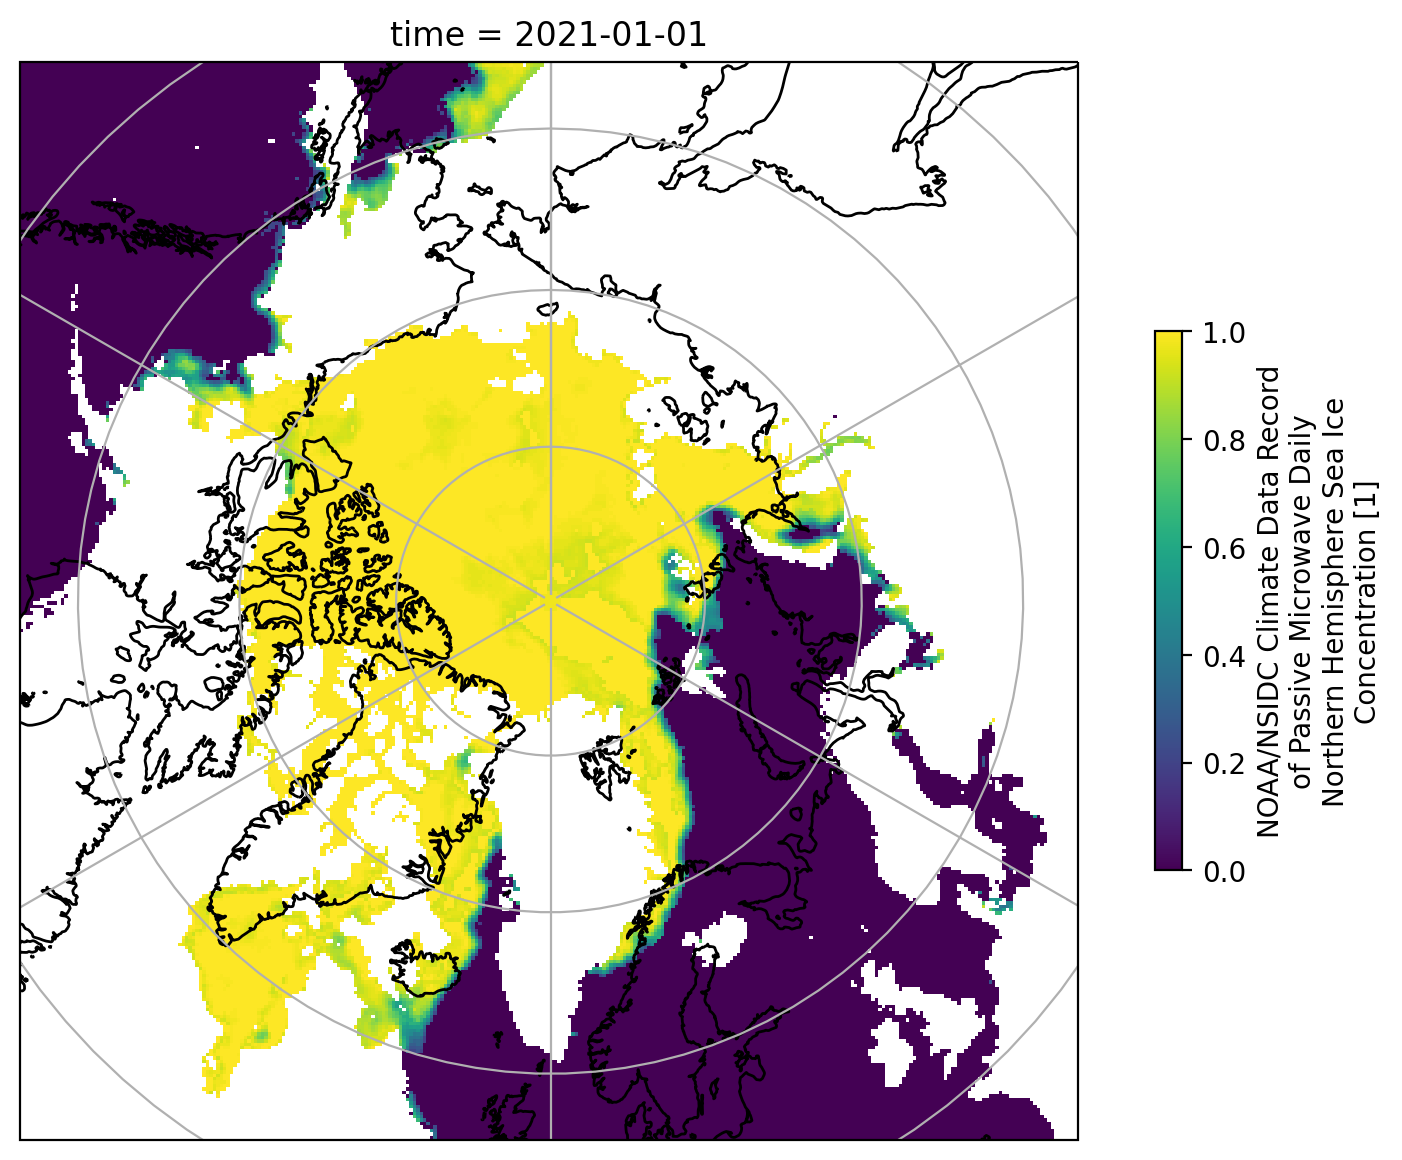

In [58]:
fig = plt.figure(figsize=(10,7))
proj_ant = ccrs.NorthPolarStereo()
ax = plt.axes(projection=proj_ant)
ax.set_extent([-180, 180, 100, 56], crs=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()

ice_conc = ds_ice.cdr_seaice_conc[0]
ice_conc = ice_conc.where(ice_conc<=1)
ice_conc.plot(vmin=0, vmax=1, cbar_kwargs={'shrink': 0.5})

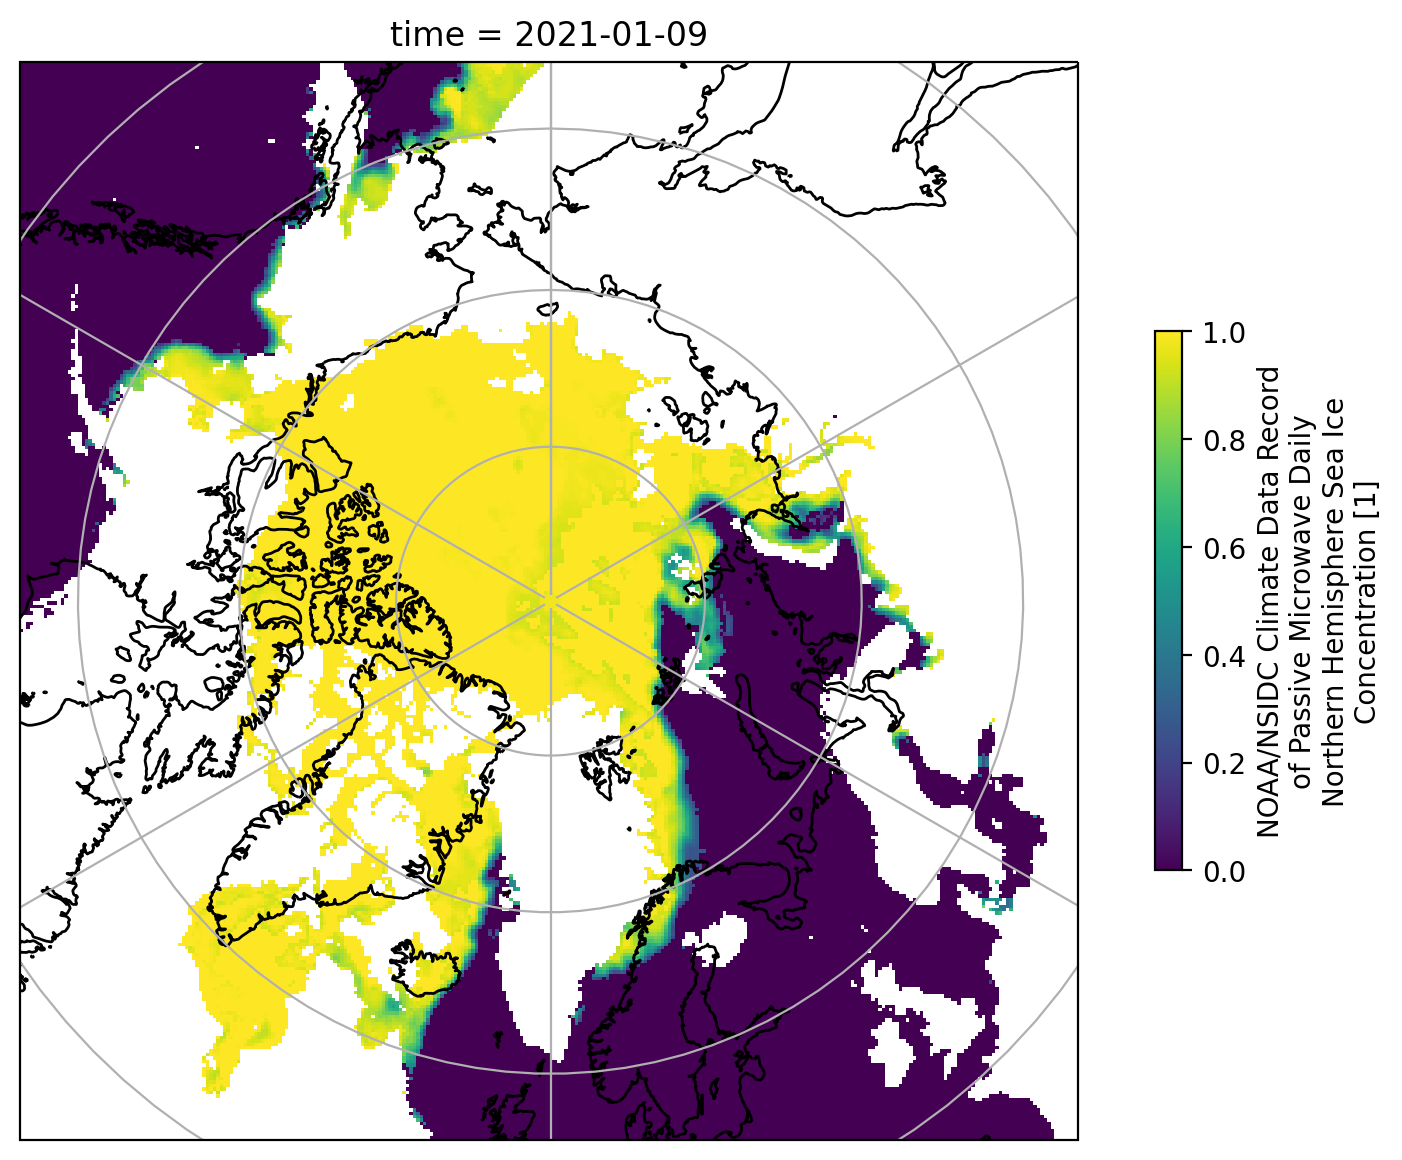

In [69]:
fig = plt.figure(figsize=(10,7))
proj_ant = ccrs.NorthPolarStereo()
ax = plt.axes(projection=proj_ant)
ax.set_extent([-180, 180, 100, 56], crs=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()

ice_conc = ds_ice.cdr_seaice_conc[8] # ds_ice.cdr_seaice_conc[ds_ice.cdr_seaice_conc.time=='2021-08-01']
ice_conc = ice_conc.where(ice_conc<=1)
ice_conc.plot(vmin=0, vmax=1, cbar_kwargs={'shrink': 0.5})

In [65]:
import datetime
ice_conc = ds_ice.cdr_seaice_conc.datetime['time'=='2021-08-01']

# will need to calculate sea ice conc ANOMALY for analysis

In [72]:
print(ice_conc)

<xarray.DataArray 'cdr_seaice_conc' (ygrid: 448, xgrid: 304)>
array([[ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ...,  0.,  0.,  0.],
       [nan, nan, nan, ...,  0.,  0.,  0.],
       [nan, nan, nan, ...,  0.,  0.,  0.]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2021-01-09
  * ygrid    (ygrid) float32 5.838e+06 5.812e+06 ... -5.312e+06 -5.338e+06
  * xgrid    (xgrid) float32 -3.838e+06 -3.812e+06 ... 3.712e+06 3.738e+06
Attributes:
    ancillary_variables:  stdev_of_cdr_seaice_conc qa_of_cdr_seaice_conc
    colorBarMaximum:      1.0
    colorBarMinimum:      0.0
    colorBarPalette:      KT_ice
    datum:                +ellps=urn:ogc:def:crs:EPSG::4326
    flag_meanings:        pole_hole lakes coastal land_mask missing_data
    flag_values:          [-5 -4 -3 -2 -1]
    ioos_category:        Ice Distribution
    long_name:            NOAA/NSIDC Climate Da

In [75]:
df = pd.DataFrame(ice_conc, columns=['time', 'ygrid','xgrid','cdr_seaice_conc'])
df = df.set_index('ISO_TIME')

ValueError: Shape of passed values is (448, 304), indices imply (448, 4)

In [70]:
ice_conc.groupby(ice_conc.index.dayofyear).aggregate({'mean',
                                                    'std'}).plot(marker='.',xlim=(0,365),title='Climatology of Datapoint Counts',xlabel='Day of Year', ylabel='Datapoint Counts')

AttributeError: 'DataArray' object has no attribute 'index'

In [ ]:
def standardize(x):
    return (x - x.mean())

fig, ax = plt.subplots(figsize=(10,6))
anomaly = daily14.groupby(daily14.index.dayofyear).transform(standardize);
anomaly.resample('A').mean().plot(marker='.');
ax.set_title('Anomaly of Daily Counts at Annual Resolution'); #will need to change, don't just want datapoint COUNTS, want actual anomaly
ax.set_xlabel('Year');
ax.set_ylabel('Anomaly');

In [38]:
#CHANGE TO NORTHERN
e.dataset_id = 'nsidcG02202v4nhmday' # https://polarwatch.noaa.gov/erddap/griddap/nsidcG02202v4nhmday.html

In [39]:
e.griddap_initialize()
print(f'variables in this dataset:\n\n{e.variables}')
print(f'\nconstraints for this dataset:\n\n{json.dumps(e.constraints, indent=1)}')

variables in this dataset:

['cdr_seaice_conc_monthly', 'melt_onset_day_cdr_seaice_conc_monthly', 'nsidc_bt_seaice_conc_monthly', 'nsidc_nt_seaice_conc_monthly', 'qa_of_cdr_seaice_conc_monthly', 'stdev_of_cdr_seaice_conc_monthly']

constraints for this dataset:

{
 "time>=": "2022-05-01T00:00:00Z",
 "time<=": "2022-05-01T00:00:00Z",
 "time_step": 1,
 "ygrid>=": 5837500.0,
 "ygrid<=": -5337500.0,
 "ygrid_step": 1,
 "xgrid>=": -3837500.0,
 "xgrid<=": 3737500.0,
 "xgrid_step": 1
}


In [40]:
e.variables = ['cdr_seaice_conc_monthly'] # this must be a list even if just one element
e.constraints = None

In [41]:
ds = e.to_xarray()
ds

<xarray.Dataset>
Dimensions:                  (time: 523, ygrid: 448, xgrid: 304)
Coordinates:
  * time                     (time) datetime64[ns] 1978-11-01 ... 2022-05-01
  * ygrid                    (ygrid) float32 5.838e+06 5.812e+06 ... -5.338e+06
  * xgrid                    (xgrid) float32 -3.838e+06 -3.812e+06 ... 3.738e+06
Data variables:
    cdr_seaice_conc_monthly  (time, ygrid, xgrid) float32 ...
Attributes: (12/65)
    acknowledgement:                                     This project was sup...
    cdm_data_type:                                       Grid
    cdr_variable:                                        cdr_seaice_conc_monthly
    comment:                                             none
    contributor_name:                                    Walter N. Meier, Flo...
    contributor_role:                                    principal investigat...
    ...                                                  ...
    summary:                                             This data set provid...
    time_coverage_duration:                              P1M
    time_coverage_end:                                   2022-05-01T00:00:00Z
    time_coverage_resolution:                            P1M
    time_coverage_start:                                 1978-11-01T00:00:00Z
    title:                                               Sea Ice Concentratio...

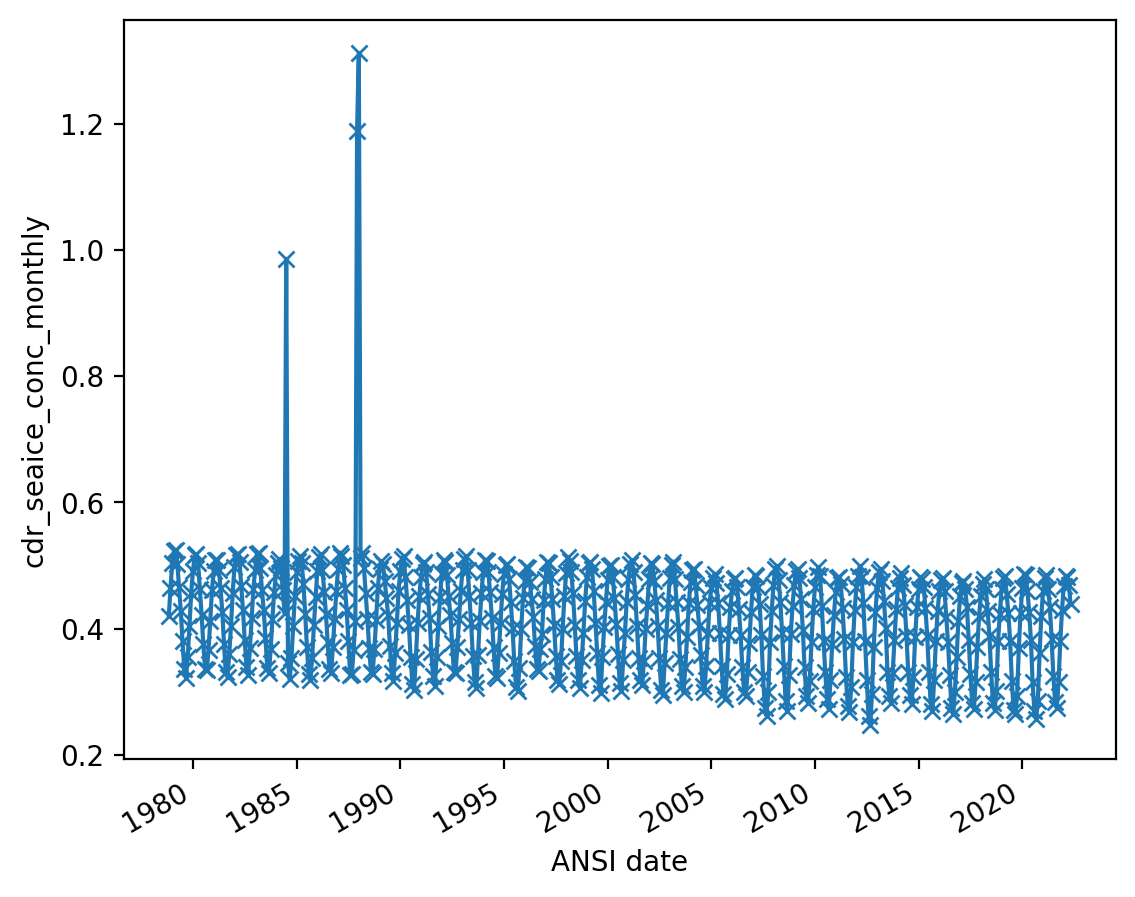

In [42]:
ice_monthly = ds.cdr_seaice_conc_monthly.mean(dim=('ygrid', 'xgrid'))
ds.cdr_seaice_conc_monthly.mean(dim=('ygrid', 'xgrid')).plot(marker='x');

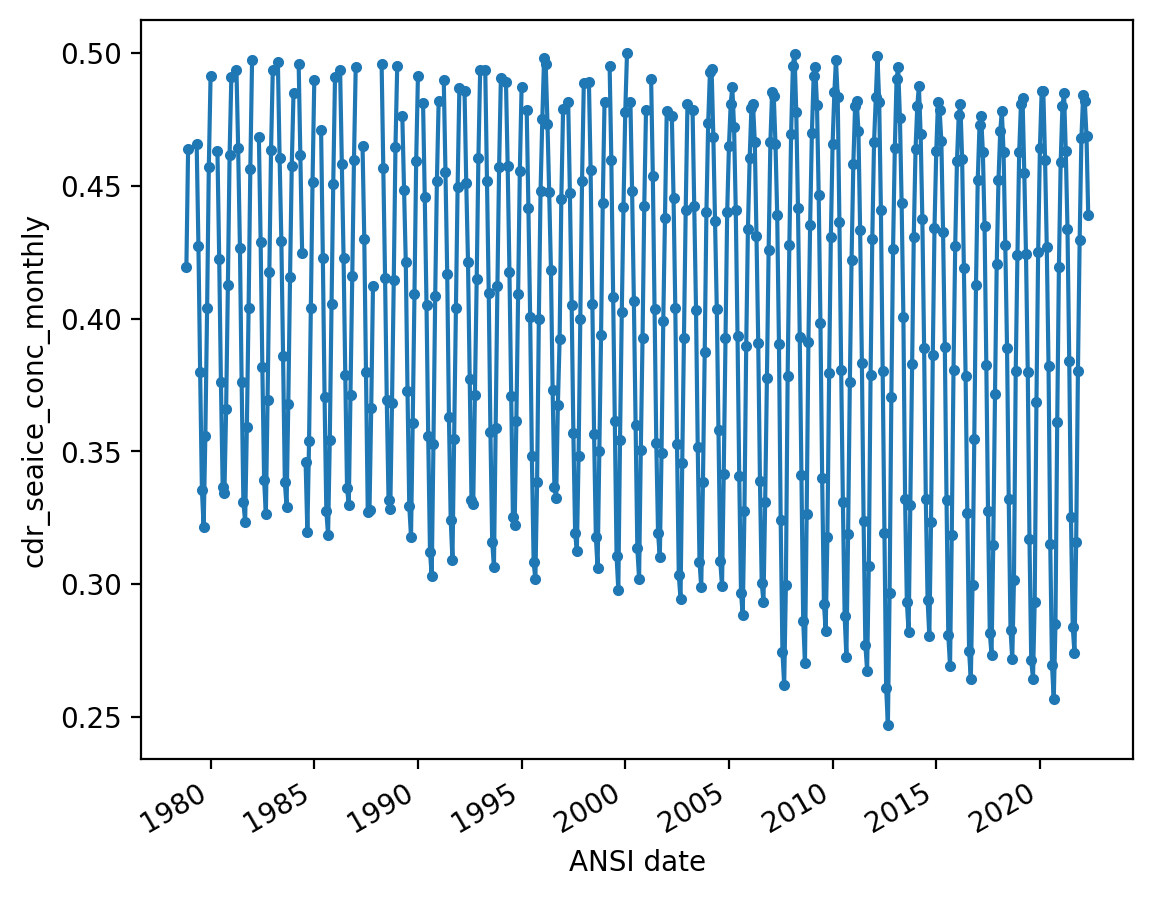

In [43]:
ice_monthly.where(ice_monthly<0.5).plot(marker='.');

# Data Import and Creation of Datasets

# Characterization Figures

# Analysis Figures

# Conclusions